<a href="https://colab.research.google.com/github/nidhi-sin-gh/world-suicide-rates-eda/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suicide Rates Overview 1985-2016 EDA Project

Exploratory Data Analysis (EDA) is a crucial step in the data science process. It involves the use of statistical and visualization techniques to gain insights into the data and uncover hidden patterns and relationships. In this notebook, we will be exploring the EDA of suicide rates from the year 1985 to 2015. Suicide is a serious public health issue that affects millions of people worldwide. By analyzing the data, we hope to gain a better understanding of the trends, factors, and patterns associated with suicide rates, and to develop effective preventive measures. This tutorial will cover topics such as suicide trends, geographical analysis, and social and economic factors that may contribute to suicide. We will also discuss potential areas for future research to continue to learn and improve our understanding of this important topic.


## Downloading the Dataset 1

**The data set about SUICIDES, POPULATION , GDP , HDI etc** 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_1_url = 'https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016 ' 

In [ ]:
import opendatasets as od
od.download(dataset_1_url)

Skipping, found downloaded files in "./suicide-rates-overview-1985-to-2016 " (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir_1 = './suicide-rates-overview-1985-to-2016 '

In [ ]:
import os
os.listdir(data_dir_1)

['master.csv']

In [ ]:
import pandas as pd
suicide_rates_raw_df = pd.read_csv('suicide-rates-overview-1985-to-2016 /master.csv')

In [ ]:
suicide_rates_raw_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "suicide-analysis-eda-project" # change this (use lowercase letters and hyphens only)

## Downloading the Dataset 2

**The data set about countries and region**

In [ ]:
dataset_2_url = 'https://www.kaggle.com/datasets/tomvebrcz/countriesandcontinents'

In [ ]:
import opendatasets as od
od.download(dataset_2_url)

Skipping, found downloaded files in "./countriesandcontinents" (use force=True to force download)


In [ ]:
data_dir_2 = './countriesandcontinents'

In [ ]:
import os
os.listdir(data_dir_2)

['countries.csv']

In [ ]:
import pandas as pd
countries_region_raw_df = pd.read_csv('countriesandcontinents/countries.csv')

In [ ]:
countries_region_raw_df

,Country,Region,Population
0,Angola,AFRICA,12127071
1,Benin,AFRICA,7862944
2,Botswana,AFRICA,1639833
3,Burkina Faso,AFRICA,13902972
4,Burundi,AFRICA,8090068
...,...,...,...
222,Solomon Islands,OCEANIA,552438
223,Tonga,OCEANIA,114689
224,Tuvalu,OCEANIA,11810
225,Vanuatu,OCEANIA,208869


## Data Preparation and Cleaning of Dataset 1


**Here is a brief description of each column in the dataframe:**

- country: The country where the suicides were recorded.
- year: The year when the suicides were recorded.
- sex: The gender of the person who committed suicide.
- age: The age group of the person who committed suicide.
- suicides_no: The number of suicides recorded for the given country, year, sex, and age group.
- population: The population of the given country, year, sex, and age group.
- suicides/100k pop: The number of suicides per 100,000 of the given population.
- country-year: A combination of the country and year columns used as a unique identifier for each observation.
- HDI for year: The Human Development Index (HDI) for the given year and country.
- gdp_for_year : The Gross Domestic Product (GDP) for the given year and country in US dollars.
- gdp_per_capita : The GDP per capita for the given year and country in US dollars.
- generation: The generation to which the person who committed suicide belonged to.

The dataframe is a comprehensive dataset of suicides across countries and various demographic factors, and can be used for exploratory analysis or for building predictive models. However, it is important to note that this topic is sensitive and requires empathy while analyzing the data.

In [ ]:
suicide_rates_raw_df.shape

(27820, 12)

This dataframe has 27820 rows and 12 columns.

**COLUMNS**

In [ ]:
suicide_rates_raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

   **RENAMING OF COLUMNS :**

In [ ]:
suicide_rates_raw_df.rename(columns = {'suicides/100k pop':'suicides_per_100k','HDI for year':'HDI_for_year', ' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita' , 'country-year':'country_year' ,'age':'age_groups'}, inplace = True)

**FIND OUT THE DATA TYPE OF THE VALUES OF EACH COLUMN IN THE DATASET :**

In [ ]:
suicide_rates_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age_groups         27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_per_100k  27820 non-null  float64
 7   country_year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Datatype of column gdp_for_year is object, but it contains numeric data.
So, we have to do the conversion.

In [ ]:
suicide_rates_raw_df['gdp_for_year'] = suicide_rates_raw_df['gdp_for_year'].str.replace(',','')

In [ ]:
suicide_rates_raw_df['gdp_for_year']=pd.to_numeric(suicide_rates_raw_df.gdp_for_year, errors='coerce')

In [ ]:
suicide_rates_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age_groups         27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_per_100k  27820 non-null  float64
 7   country_year       27820 non-null  object 
 8   HDI_for_year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


Data type of gdp_for_year is now relevant.

#### VALUES INSIDE THE DATAFRAME

**Country :**

In [ ]:
suicide_rates_raw_df.country.nunique()

101

We have data from 101 countries.

**Year :**

In [ ]:
suicide_rates_raw_df.year.nunique()

32

We have data for the 32 years worth time interval.

**Age Groups :**

In [ ]:
suicide_rates_raw_df.age_groups.nunique()

6

Total data we have is divided into six age groups.

**Generation :**

In [ ]:
suicide_rates_raw_df.generation.nunique()

6

We have six generations worth data.

**SUICIDE RATES DATAFRAME**

For our analysis we will not use all of the columns. Let's remove the extra columns.

In [ ]:
required_1 = ['country', 'year', 'sex', 'age_groups', 'suicides_no', 'population', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation']

In [ ]:
suicide_rates_df = suicide_rates_raw_df[required_1].copy()

Let's see the sample of cleaned data set we have ...!!

In [ ]:
suicide_rates_df.sample(10)

,country,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
25074,Thailand,1996,male,25-34 years,1040,5350491,NaN,183035154107,3324,Generation X
11492,Hungary,2001,female,25-34 years,38,742972,NaN,53821315066,5546,Generation X
27793,Uzbekistan,2012,female,55-74 years,25,1283060,0.668,51821573338,1964,Boomers
4740,Bulgaria,2001,male,25-34 years,100,569711,NaN,14075616789,1854,Generation X
22990,Slovakia,2010,male,55-74 years,145,472869,0.827,89501012916,17387,Silent
9224,France,1996,female,35-54 years,1135,8060200,NaN,1605675086550,29305,Boomers
4797,Bulgaria,2006,male,55-74 years,274,807552,NaN,34130122491,4638,Silent
13075,Italy,2008,male,5-14 years,2,2866857,NaN,2390729163615,41935,Generation Z
17958,Norway,1993,female,75+ years,19,198800,NaN,120579072751,30066,G.I. Generation
17534,New Zealand,1992,male,55-74 years,67,254700,NaN,41636005955,12868,Silent


## Data Preparation and Cleaning of Dataset 2

**TODO** - Write some explanation here.



In [ ]:
countries_region_raw_df.shape

(227, 3)

This dataset has 227 rows and 3 columns.

**COLUMNS**

In [ ]:
countries_region_raw_df.columns

Index(['Country', 'Region', 'Population'], dtype='object')

**RENAMING OF COLUMNS :**

In [ ]:
countries_region_raw_df.rename(columns = {'Country':'country' , 'Region':'region' , 'Population':'population'}, inplace = True)

**FIND OUT THE DATA TYPE OF THE VALUES OF EACH COLUMN IN THE DATASET :**

In [ ]:
countries_region_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     227 non-null    object
 1   region      227 non-null    object
 2   population  227 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


#### VALUES INSIDE THE COLUMNS

**COUNTRY :**

In [ ]:
countries_region_raw_df.country.nunique()

227

We have 227 countries here.


**REGION :**

In [ ]:
countries_region_raw_df.region.nunique()

7

We have data from 7 regions.

**COUNTRIES REGION DATAFRAME**

We do not require all the columns of this dataset. So we will select only relevant columns.

In [ ]:
required_2 = ['country', 'region']

In [ ]:
countries_region_df = countries_region_raw_df[required_2].copy()

Let's see how our cleaned dataset looks like ....!!

In [ ]:
countries_region_df.sample(10)

,country,region
164,Haiti,LATIN
77,Nepal,ASIA
25,Madagascar,AFRICA
98,Russia,EUROPE
26,Malawi,AFRICA
218,N. Mariana Islands,OCEANIA
119,Monaco,EUROPE
78,Pakistan,ASIA
112,Ireland,EUROPE
111,Iceland,EUROPE


## Merging Datasets

**TODO** - add some explanation here

We have two separate data sets, for analysis we will be needing them both together. So, we are going to join both of the data frames together by their common attribute.

In [ ]:
dataframe = countries_region_df.merge(suicide_rates_df, on = 'country')

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


So, now we have a new dataframe with the attributes of both datasets.

Let's get the insights of this merged dataframe.

In [ ]:
dataframe.shape

(25744, 11)

The merged dataframe has 25584 rows and 12 columns.

**COLUMNS**

In [ ]:
dataframe.columns

Index(['country', 'region', 'year', 'sex', 'age_groups', 'suicides_no',
       'population', 'HDI_for_year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

#### Values inside the columns

**COUNTRY:**

In [ ]:
dataframe.country.nunique()

91

Merged dataframe contains data of 90 countries.

**REGION :**

In [ ]:
dataframe.region.nunique()

7

It contains 7 regions.

**YEAR :**

In [ ]:
dataframe.year.nunique()

32

Dataframe has 32 years long data.

**NUMERIC INSIGHTS :**

In [ ]:
dataframe.describe()

,year,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita
count,25744.000000,25744.000000,2.574400e+04,8040.000000,2.574400e+04,25744.000000
mean,2001.265227,204.498951,1.761726e+06,0.779442,4.581492e+11,17544.261342
std,8.475005,664.319629,3.833422e+06,0.093640,1.504379e+12,19404.000157
min,1985.000000,0.000000,2.780000e+02,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,1.139965e+05,0.715000,1.015098e+10,3366.000000
50%,2002.000000,26.000000,4.421200e+05,0.782500,4.917043e+10,10157.000000
75%,2009.000000,129.000000,1.401862e+06,0.859000,2.514045e+11,26004.000000
max,2016.000000,11767.000000,4.380521e+07,0.944000,1.812071e+13,126352.000000


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### COUNTRIES IN A REGION

Let's check that which region contains how many countries in this data set.

For this we will create a new dataframe containing the list of region and countries.

In [ ]:
region_country = dataframe[['region','country']]

In [ ]:
region_country

,region,country
0,AFRICA,Mauritius
1,AFRICA,Mauritius
2,AFRICA,Mauritius
3,AFRICA,Mauritius
4,AFRICA,Mauritius
...,...,...
25739,OCEANIA,New Zealand
25740,OCEANIA,New Zealand
25741,OCEANIA,New Zealand
25742,OCEANIA,New Zealand


In [ ]:
region_country.drop_duplicates()

,region,country
0,AFRICA,Mauritius
382,AFRICA,Seychelles
598,ASIA,Japan
970,ASIA,Macau
982,ASIA,Maldives
...,...,...
24400,NORTHERN_AMERICA,United States
24772,OCEANIA,Australia
25132,OCEANIA,Fiji
25264,OCEANIA,Kiribati


Now we have removed all the duplicate rows. Let's find out the total number of countries belong to each continent.

In [ ]:
region_country_1 = region_country.groupby('region')[['country']].count()

In [ ]:
region_country_1

,country
region,
AFRICA,598
ASIA,2768
EUROPE,11704
LATIN,7510
NEAR_EAST,1472
NORTHERN_AMERICA,720
OCEANIA,972


Here we have..!!!

According to this extracted data, we have most countries from EUROPE and least countries from AFRICA.

**Creating a pie chart of this data**

In [ ]:
colors = sns.color_palette("rocket")[0:10]

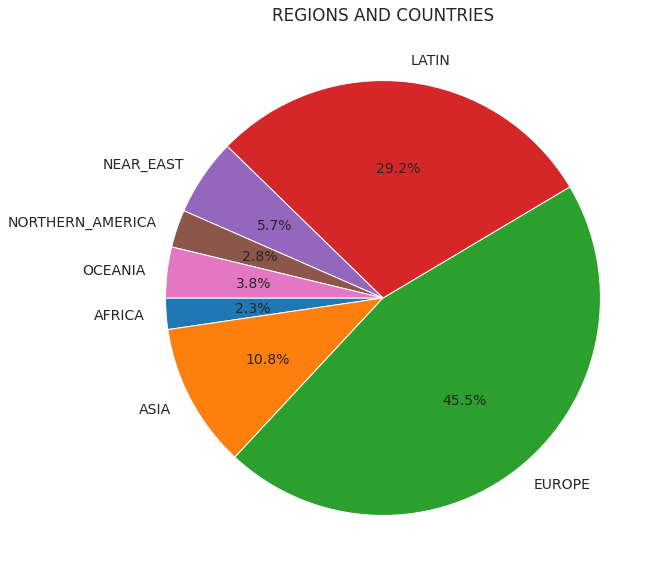

In [ ]:
plt.figure(figsize=(10,10))
plt.title("REGIONS AND COUNTRIES")
plt.pie(region_country_1.country ,
        labels=region_country_1.index,
        #colors = colors,
        autopct='%1.1f%%', 
        startangle=180);

From the pie chart we found that :

- 29.3% countries out of total countries in the data set are from LATIN REGION.
- 45.4% countries out of total countries in the data set are from EUROPE REGION.
- 10.7% countries out of total countries in the data set are from ASIA.
- 2.3% countries out of total countries in the data set are from AFRICA.
- 3.8% countries out of total countries in the data set are from OCEANIA.
- 2.8% countries out of total countries in the data set are from NORTHERN AMERICA.
- 5.7% countries out of total countries in the data set are from NEAR EAST.


### MALE AND FEMALE POPULATION PER COUNTRY

Find out the male population and female population of each country ...!!

To do that, let's start with grouping the gender with respect to country and calculating the sum of population and suicides

In [ ]:
population = dataframe.groupby(['country','sex'])[['population','suicides_no']].sum()

Due to grouping operation country and sex are by default set as index, we have to remove them as index.

In [ ]:
population_1 = population.reset_index(['country','sex'])

Now we have the data frame for this calculation.

In [ ]:
population_1

,country,sex,population,suicides_no
0,Albania,female,31301599,693
1,Albania,male,31023868,1277
2,Argentina,female,529728151,18326
3,Argentina,male,506257280,63893
4,Armenia,female,40457688,495
...,...,...,...,...
177,United States,male,3940328915,820216
178,Uruguay,female,43502425,2820
179,Uruguay,male,40566518,10318
180,Uzbekistan,female,245541610,9260


Now let's calculate the total population of each country. For which we will group the data from the data frame population_1 into country and perform the sum of population.

In [ ]:
pop_total = population_1.groupby('country')[['population']].sum()

Let's sort the data in decreasing order.

In [ ]:
pop_total = pop_total.sort_values('population' , ascending = False)

In [ ]:
pop_total = pop_total.reset_index('country')

In [ ]:
pop_total.rename(columns = {'population' : 'total_population'}, inplace = True)

We have final data frame with the list of countries and their total population in decreasing order.

In [ ]:
pop_total

,country,total_population
0,United States,8054027201
1,Brazil,4856093548
2,Japan,3681024844
3,Mexico,2772959159
4,Germany,2024875612
...,...,...
86,Aruba,1259677
87,Kiribati,741606
88,Macau,346542
89,San Marino,78825


**MOST POPULATED COUNTRIES**

In [ ]:
population_most = pop_total.merge(population_1 , on = 'country')

In [ ]:
population_most_1 = population_most.head(20)

In [ ]:
population_most_1

,country,total_population,sex,population,suicides_no
0,United States,8054027201,female,4113698286,213797
1,United States,8054027201,male,3940328915,820216
2,Brazil,4856093548,female,2465480125,49015
3,Brazil,4856093548,male,2390613423,177598
4,Japan,3681024844,female,1884787499,251630
5,Japan,3681024844,male,1796237345,555272
6,Mexico,2772959159,female,1397570687,19334
7,Mexico,2772959159,male,1375388472,91805
8,Germany,2024875612,female,1038636437,79707
9,Germany,2024875612,male,986239175,211555


In [ ]:
colors_1 = sns.color_palette("rocket_r")

Plotting a double bar graph with the male and female population of 20 most populated countries.

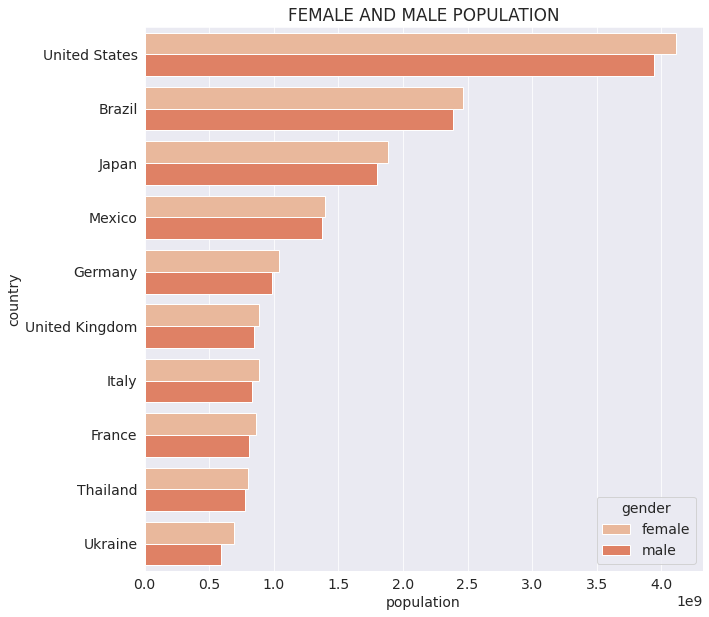

In [ ]:
plt.figure(figsize=(10,10))
plt.title("FEMALE AND MALE POPULATION")
sns.barplot(x='population', y='country', hue='sex' , data=population_most_1, palette=colors_1)
plt.legend(loc='lower right' , title = 'gender');

We see that female population in each of the most populated countries is greater than the male population.

**LEAST POPULATED COUNTRIES**

In [ ]:
population_least = population_most.sort_values('total_population', ascending=False).tail(20)

In [ ]:
population_least

,country,total_population,sex,population,suicides_no
162,Saint Lucia,3910520,female,2002322,34
163,Saint Lucia,3910520,male,1908198,196
164,Maldives,2900246,female,1361977,6
165,Maldives,2900246,male,1538269,14
166,Grenada,2347286,female,1184126,4
167,Grenada,2347286,male,1163160,34
168,Mongolia,2167589,female,1119571,52
169,Mongolia,2167589,male,1048018,371
170,Seychelles,1392816,female,696775,9
171,Seychelles,1392816,male,696041,89


Plotting a double bar graph with the male and female population of 20 least populated countries.

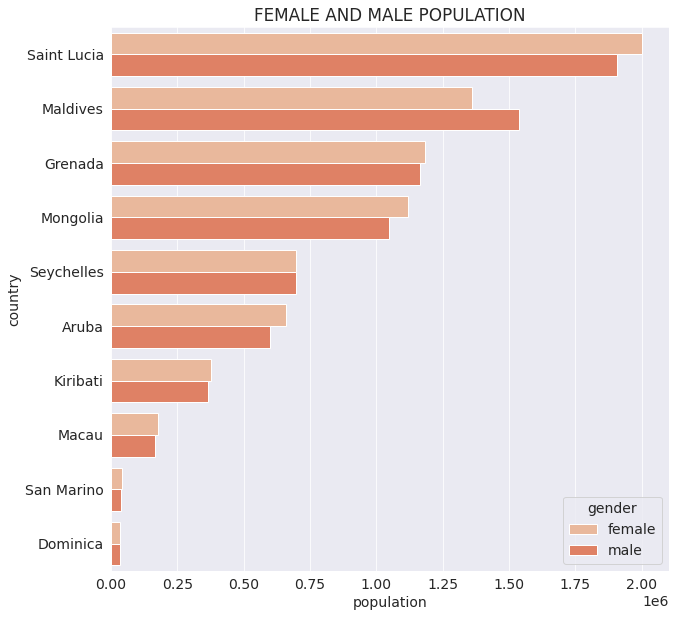

In [ ]:
plt.figure(figsize=(10,10))
plt.title("FEMALE AND MALE POPULATION")
sns.barplot(x='population', y='country', hue='sex' , data=population_least, palette=colors_1)
plt.legend(loc='lower right' , title = 'gender');

Most of the least populated countries have more female population than the male population, whereas male population is more in MALDIVES & SAN MARINO and both female and male populations are equal in SEYCHELLES & DOMINICA.

### Female and Male suicides per country

We already have analyzed the female and male population per country. Now we will move forward to do same with suicides.

For this we will access the previous table which contains this information.

In [ ]:
population_1

,country,sex,population,suicides_no
0,Albania,female,31301599,693
1,Albania,male,31023868,1277
2,Argentina,female,529728151,18326
3,Argentina,male,506257280,63893
4,Armenia,female,40457688,495
...,...,...,...,...
177,United States,male,3940328915,820216
178,Uruguay,female,43502425,2820
179,Uruguay,male,40566518,10318
180,Uzbekistan,female,245541610,9260


Creating a dataframe for total suicides per country.

In [ ]:
new_pop = population_1.groupby('country')[['suicides_no']].sum()

In [ ]:
new_pop

,suicides_no
country,
Albania,1970
Argentina,82219
Armenia,1905
Aruba,101
Australia,70111
...,...
United Arab Emirates,622
United Kingdom,136805
United States,1034013


In [ ]:
new_pop.rename(columns = {'suicides_no' : 'total_suicides'}, inplace = True)

In [ ]:
new_pop

,total_suicides
country,
Albania,1970
Argentina,82219
Armenia,1905
Aruba,101
Australia,70111
...,...
United Arab Emirates,622
United Kingdom,136805
United States,1034013


In [ ]:
new_pop.reset_index(['country'])

,country,total_suicides
0,Albania,1970
1,Argentina,82219
2,Armenia,1905
3,Aruba,101
4,Australia,70111
...,...,...
86,United Arab Emirates,622
87,United Kingdom,136805
88,United States,1034013
89,Uruguay,13138


Merging tables to get desired table

In [ ]:
merged_suicides = population_1.merge(new_pop, on = 'country')

In [ ]:
merged_suicides

,country,sex,population,suicides_no,total_suicides
0,Albania,female,31301599,693,1970
1,Albania,male,31023868,1277,1970
2,Argentina,female,529728151,18326,82219
3,Argentina,male,506257280,63893,82219
4,Armenia,female,40457688,495,1905
...,...,...,...,...,...
177,United States,male,3940328915,820216,1034013
178,Uruguay,female,43502425,2820,13138
179,Uruguay,male,40566518,10318,13138
180,Uzbekistan,female,245541610,9260,34803


**COUNTRIES WITH MOST SUICIDES**

In [ ]:
most_suicides_country = merged_suicides.sort_values('total_suicides' , ascending = False).head(20)

In [ ]:
colors_2 = sns.color_palette("mako")

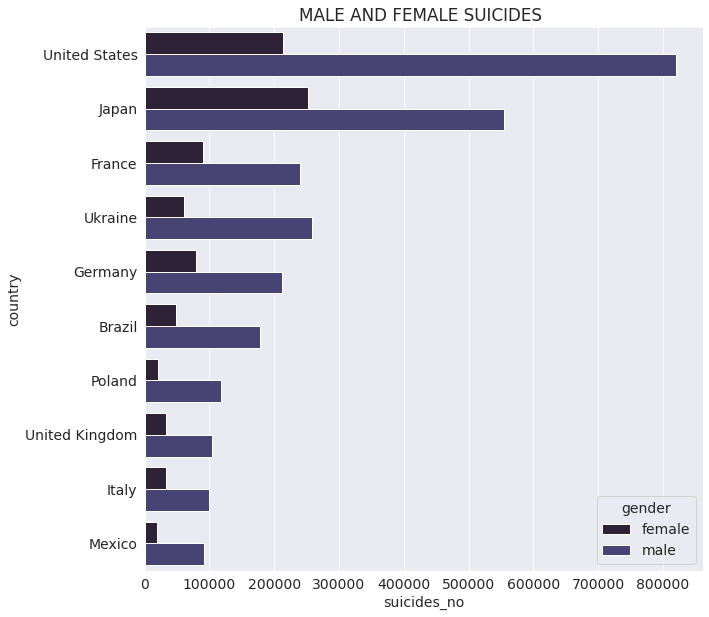

In [ ]:
plt.figure(figsize=(10,10))
plt.title("MALE AND FEMALE SUICIDES ")
sns.barplot(x='suicides_no', y='country', hue='sex' , data=most_suicides_country, palette=colors_2)
plt.legend(loc='lower right' , title = 'gender');

Ind each of the countries from the graph we can say that that number of male suicides is too larger than the number of female suicide.

**COUNTRIES WITH LEAST SUICIDES**

In [ ]:
least_suicides_country = merged_suicides.sort_values('total_suicides' , ascending = True)

In [ ]:
least_suicides_country

,country,sex,population,suicides_no,total_suicides
49,Dominica,male,33400,0,0
48,Dominica,female,33000,0,0
143,San Marino,male,38358,4,4
142,San Marino,female,40467,0,4
104,Maldives,female,1361977,6,20
...,...,...,...,...,...
61,France,male,808977854,239708,329127
86,Japan,female,1884787499,251630,806902
87,Japan,male,1796237345,555272,806902
176,United States,female,4113698286,213797,1034013


In [ ]:
suicide_rates_raw_df.drop(suicide_rates_raw_df[suicide_rates_raw_df.year == 2016 ].index, inplace=True)

In [ ]:
least_suicides_country.drop(least_suicides_country[least_suicides_country.total_suicides <= 0].index, inplace = True)

In [ ]:
least_suicides_country_1 = least_suicides_country.head(20)

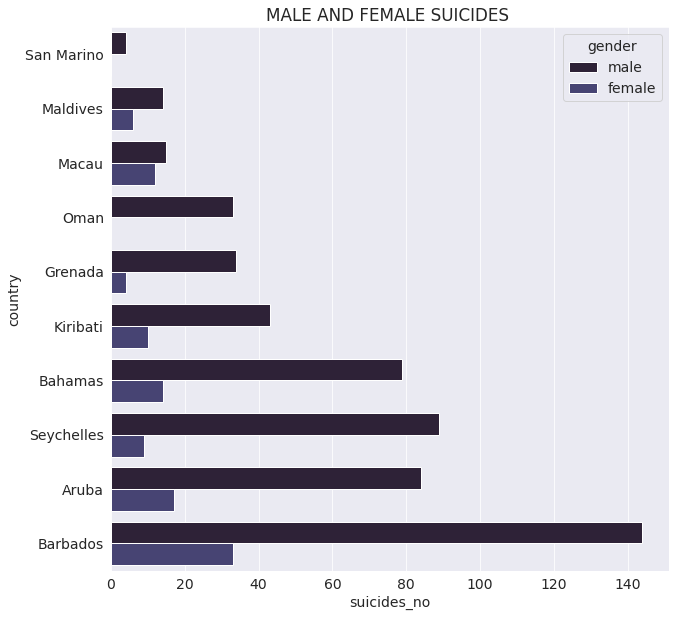

In [ ]:
plt.figure(figsize=(10,10))
plt.title("MALE AND FEMALE SUICIDES ")
sns.barplot(x='suicides_no', y='country', hue='sex' , data=least_suicides_country_1, palette=colors_2)
plt.legend(loc='upper right' , title = 'gender');

In each of the countries from the graph we can say that that number of male suicides is too larger than the number of female suicide.

### MALE AND FEMALE SUICIDES IN MOST POPULATED COUNTRY PER YEAR

In [ ]:
pop_total

,country,total_population
0,United States,8054027201
1,Brazil,4856093548
2,Japan,3681024844
3,Mexico,2772959159
4,Germany,2024875612
...,...,...
86,Aruba,1259677
87,Kiribati,741606
88,Macau,346542
89,San Marino,78825


We know that most populated country is United States. So we will create a chart for the population in United States for years

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


In [ ]:
most_pop = dataframe[dataframe.country == 'United States']

In [ ]:
most_pop

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
24400,United States,NORTHERN_AMERICA,1985,male,75+ years,2177,4064000,0.841,4346734000000,19693,G.I. Generation
24401,United States,NORTHERN_AMERICA,1985,male,55-74 years,5302,17971000,0.841,4346734000000,19693,G.I. Generation
24402,United States,NORTHERN_AMERICA,1985,male,25-34 years,5134,20986000,0.841,4346734000000,19693,Boomers
24403,United States,NORTHERN_AMERICA,1985,male,35-54 years,6053,26589000,0.841,4346734000000,19693,Silent
24404,United States,NORTHERN_AMERICA,1985,male,15-24 years,4267,19962000,0.841,4346734000000,19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
24767,United States,NORTHERN_AMERICA,2015,female,25-34 years,1444,21555712,NaN,18120714000000,60387,Millenials
24768,United States,NORTHERN_AMERICA,2015,female,15-24 years,1132,21633813,NaN,18120714000000,60387,Millenials
24769,United States,NORTHERN_AMERICA,2015,female,75+ years,540,11778666,NaN,18120714000000,60387,Silent
24770,United States,NORTHERN_AMERICA,2015,male,5-14 years,255,21273987,NaN,18120714000000,60387,Generation Z


In [ ]:
us_pop_per_year = most_pop.groupby(['year','sex'])[['suicides_no']].sum()

In [ ]:
us_pop_per_year

suicides_no
year sex                
1985 female         6308
     male          23138
1986 female         6677
     male          24215
1987 female         6522
...                  ...
2013 male          32049
2014 female         9659
     male          33110
2015 female        10199
     male          33990

[62 rows x 1 columns]

In [ ]:
us_pop_per_year = us_pop_per_year.reset_index(['year' , 'sex'])

In [ ]:
us_pop_per_year = us_pop_per_year.pivot('year', 'sex', 'suicides_no')

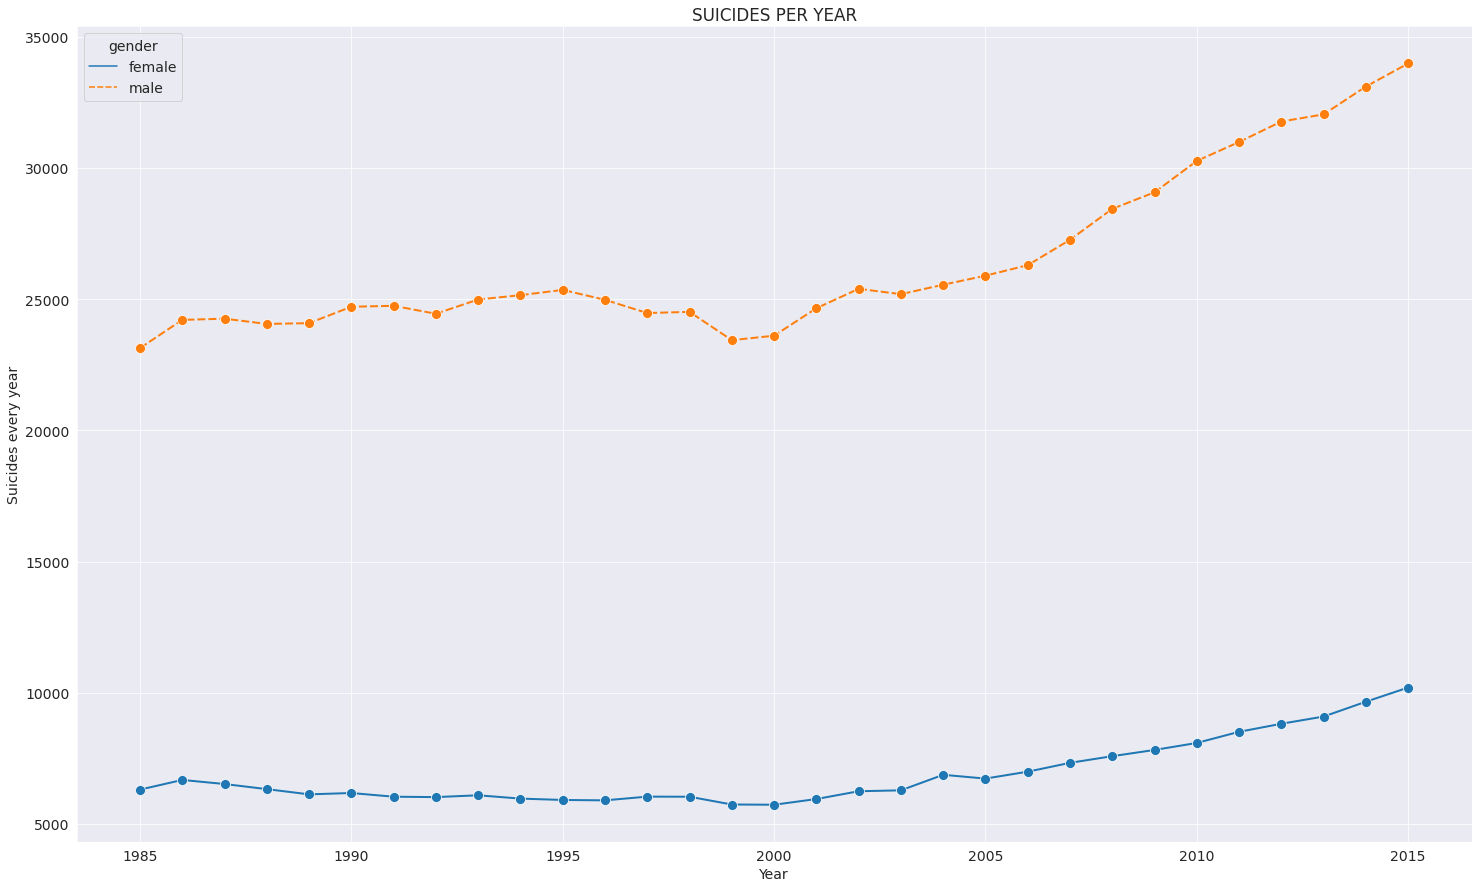

In [ ]:
plt.figure(figsize = (25,15))
plt.title('SUICIDES PER YEAR')
sns.lineplot(data = us_pop_per_year , marker = 'o' ,linewidth = 2 , markersize = 10 ) 
plt.xlabel('Year')
plt.ylabel('Suicides every year');
plt.legend(loc='upper left' , title = 'gender');

We can see that there is a huge difference between male suicides and females suicides. We can see that the male suicides as well as female suicides both are increasing by the time gradually.

### TOTAL SUICIDES OVER THE TIME

In [ ]:
suicides_year = dataframe.groupby(['year','sex'])[['suicides_no']].sum()

In [ ]:
suicides_year

suicides_no
year sex                
1985 female        31476
     male          80867
1986 female        32927
     male          84181
1987 female        34078
...                  ...
2014 male         139103
2015 female        38616
     male         125596
2016 female         3504
     male          12099

[64 rows x 1 columns]

In [ ]:
suicides_year = suicides_year.reset_index(['year', 'sex'])

In [ ]:
suicides_year.sample(3)

,year,sex,suicides_no
35,2002,male,148316
48,2009,female,42817
7,1988,male,85775


In [ ]:
suicides_year.columns

Index(['year', 'sex', 'suicides_no'], dtype='object')

In [ ]:
new_suicide_year = suicides_year.pivot('year', 'sex', 'suicides_no')

In [ ]:
new_suicide_year

sex,female,male
year,,
1985,31476,80867
1986,32927,84181
1987,34078,89344
1988,32138,85775
1989,31873,87254
1990,40369,110629
1991,40202,115320
1992,41346,120508
1993,39933,121487


In [ ]:
color_4 = ["#5A9", "#2b1f3e"]

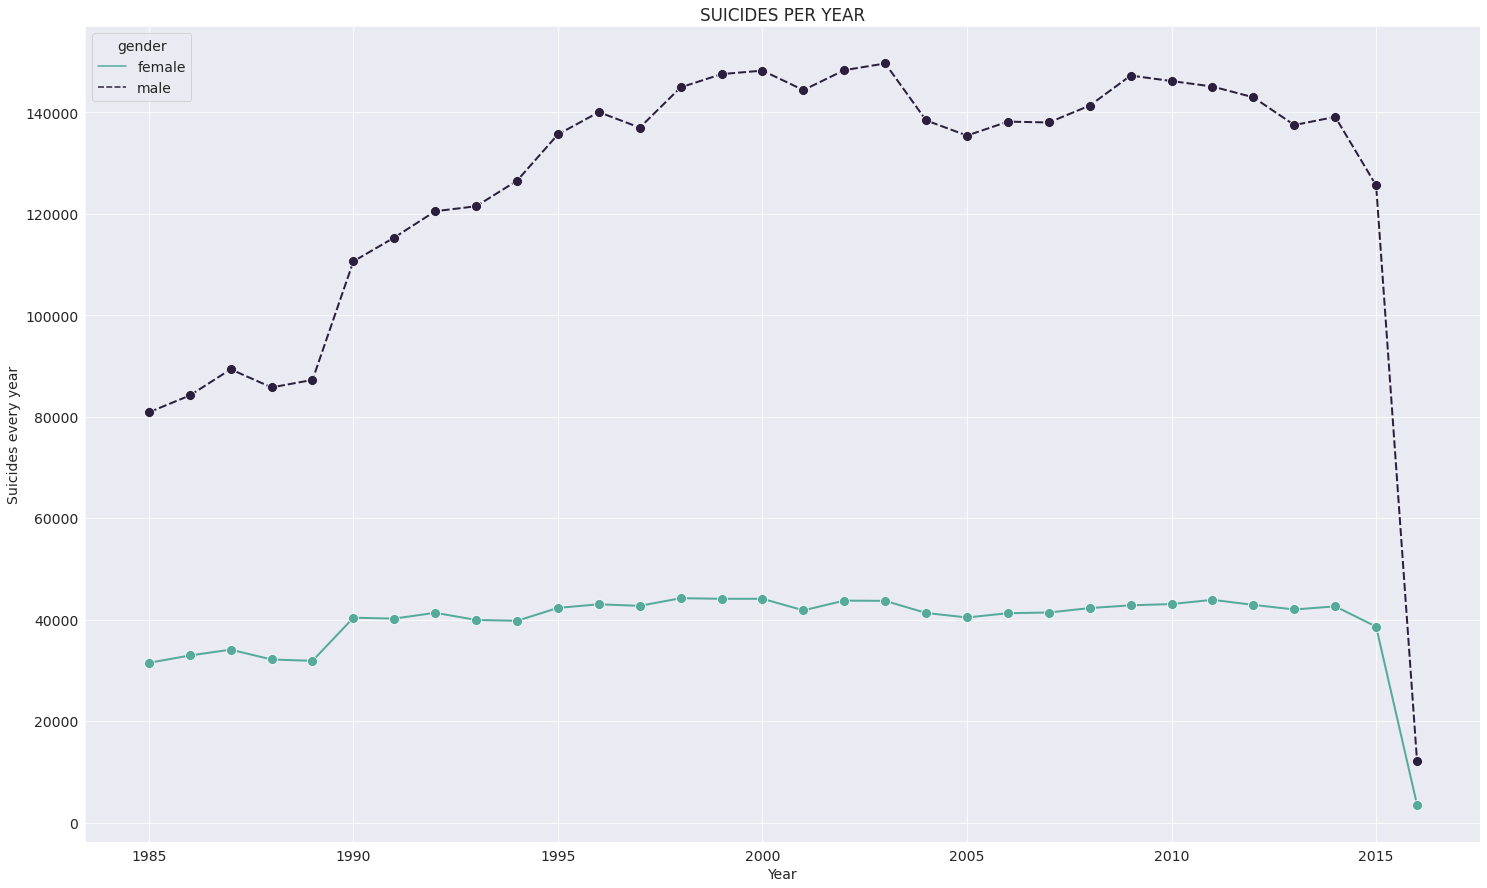

In [ ]:
plt.figure(figsize = (25,15))
plt.title('SUICIDES PER YEAR')
sns.lineplot(data = new_suicide_year , marker = 'o' ,linewidth = 2 , markersize = 10 , palette = color_4) 
plt.xlabel('Year')
plt.ylabel('Suicides every year');
plt.legend(loc='upper left' , title = 'gender');



- Male suicides were increasing per year till 2002 and Maximum suicides were between 2002 and 2003 after that suicides started decreasing and after 2005 again it increased and after 2009 it is relatively decreasing.
- Female suicides are almost constant over the time period there is not much deviation in it except for female suicides were lowest for 1985 to 1989 in 1990 it increased then till 2015 the suicides has not varied much.

## Asking and Answering Questions


#### Q1: WHAT IS THE YEAR-WISE EFFECT POPULATION ON GDP IN MOST POPULATED COUNTRY ?

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


In [ ]:
pop_total

,country,total_population
0,United States,8054027201
1,Brazil,4856093548
2,Japan,3681024844
3,Mexico,2772959159
4,Germany,2024875612
...,...,...
86,Aruba,1259677
87,Kiribati,741606
88,Macau,346542
89,San Marino,78825


We have most populated country United States and least populated country Dominica.

**DOING CALCULATION FOR MOST POPULATED COUNTRY**

In [ ]:
most_pop

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
24400,United States,NORTHERN_AMERICA,1985,male,75+ years,2177,4064000,0.841,4346734000000,19693,G.I. Generation
24401,United States,NORTHERN_AMERICA,1985,male,55-74 years,5302,17971000,0.841,4346734000000,19693,G.I. Generation
24402,United States,NORTHERN_AMERICA,1985,male,25-34 years,5134,20986000,0.841,4346734000000,19693,Boomers
24403,United States,NORTHERN_AMERICA,1985,male,35-54 years,6053,26589000,0.841,4346734000000,19693,Silent
24404,United States,NORTHERN_AMERICA,1985,male,15-24 years,4267,19962000,0.841,4346734000000,19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
24767,United States,NORTHERN_AMERICA,2015,female,25-34 years,1444,21555712,NaN,18120714000000,60387,Millenials
24768,United States,NORTHERN_AMERICA,2015,female,15-24 years,1132,21633813,NaN,18120714000000,60387,Millenials
24769,United States,NORTHERN_AMERICA,2015,female,75+ years,540,11778666,NaN,18120714000000,60387,Silent
24770,United States,NORTHERN_AMERICA,2015,male,5-14 years,255,21273987,NaN,18120714000000,60387,Generation Z


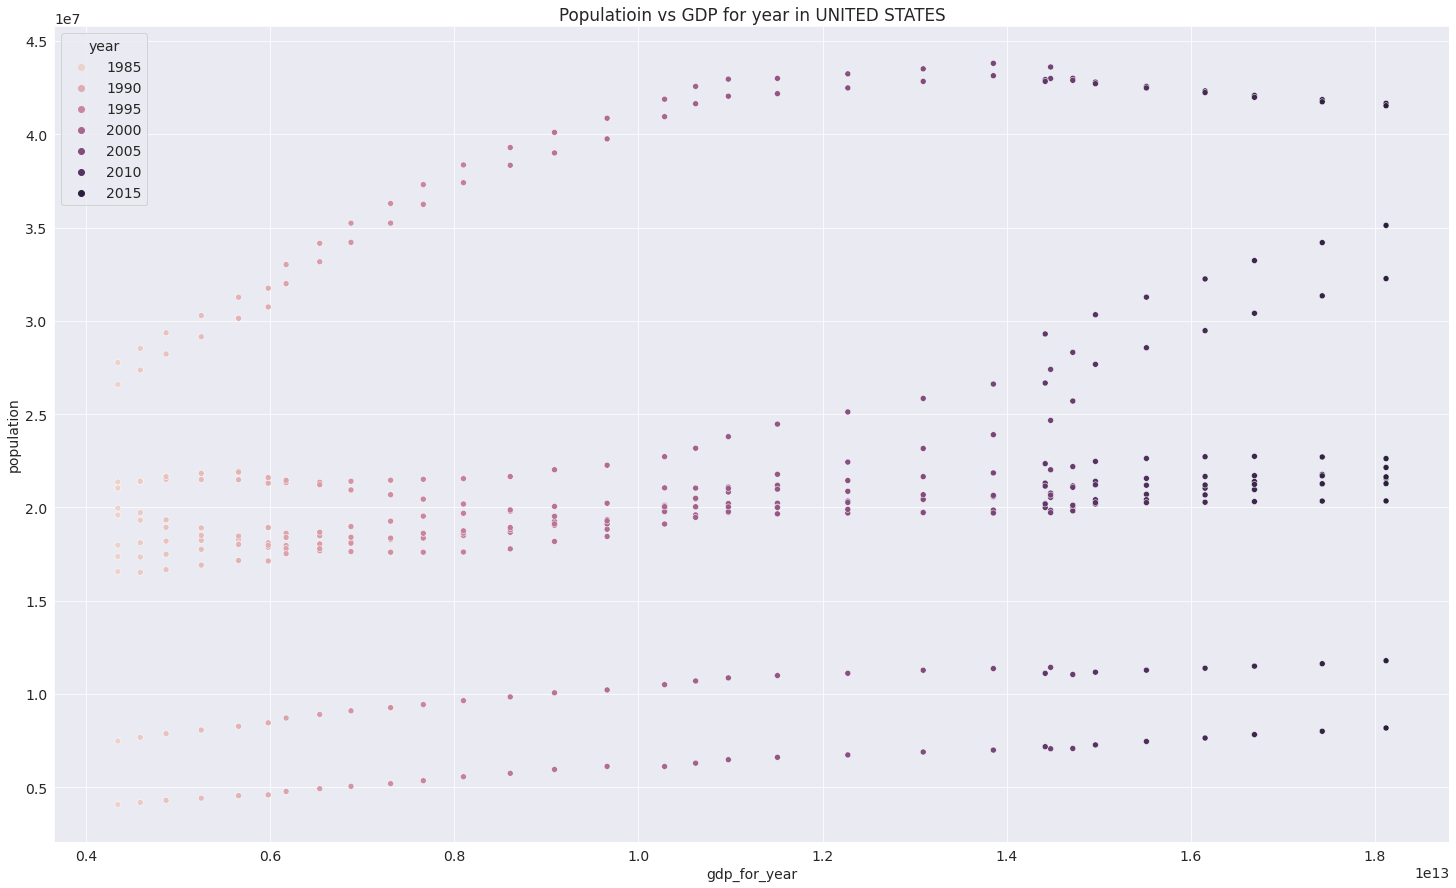

In [ ]:
plt.figure(figsize = (25,15))
plt.title('Populatioin vs GDP for year in UNITED STATES')
sns.scatterplot( data = most_pop ,
            x = 'gdp_for_year' ,
            y = 'population' ,
               hue = 'year');

In most populated country i.e. UNITED STATES, from 1985 the population above 25 million is showing positive correlation whereas after somewhat 2000 there is no correlation.But overall population is not showing any correlation with HDI. We can say that overall POPULATION is not related to HDI for year 

#### Q2: WHAT IS YEAR-WISE SUICIDE PERCENTAGE OF MEN vs WOMEN ?

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


In [ ]:
need = ['year' , 'sex' , 'suicides_no' , 'population']

In [ ]:
df_suicide_percent = dataframe[need].copy()

In [ ]:
df_suicide_percent

,year,sex,suicides_no,population
0,1985,female,2,8800
1,1985,male,19,88500
2,1985,male,18,89500
3,1985,male,9,45300
4,1985,male,21,109400
...,...,...,...,...
25739,2013,female,21,283720
25740,2013,female,19,447810
25741,2013,female,5,152240
25742,2013,female,2,291080


In [ ]:
df_suicide_percent = df_suicide_percent.groupby(['year' , 'sex'])[['suicides_no', 'population']].sum()

In [ ]:
df_suicide_percent = df_suicide_percent.reset_index(['year', 'sex'])

In [ ]:
df_suicide_percent

,year,sex,suicides_no,population
0,1985,female,31476,494014763
1,1985,male,80867,476708249
2,1986,female,32927,505177903
3,1986,male,84181,485977640
4,1987,female,34078,539607286
...,...,...,...,...
59,2014,male,139103,822525237
60,2015,female,38616,783948979
61,2015,male,125596,755197961
62,2016,female,3504,67368499


In [ ]:
df_suicide_percent['suicide_percentage'] = df_suicide_percent['suicides_no'] * 100 / df_suicide_percent['population']

In [ ]:
df_suicide_percent

,year,sex,suicides_no,population,suicide_percentage
0,1985,female,31476,494014763,0.006371
1,1985,male,80867,476708249,0.016964
2,1986,female,32927,505177903,0.006518
3,1986,male,84181,485977640,0.017322
4,1987,female,34078,539607286,0.006315
...,...,...,...,...,...
59,2014,male,139103,822525237,0.016912
60,2015,female,38616,783948979,0.004926
61,2015,male,125596,755197961,0.016631
62,2016,female,3504,67368499,0.005201


In [ ]:
pivot_df_suicide_percent = df_suicide_percent.pivot('year', 'sex' , 'suicide_percentage')

In [ ]:
pivot_df_suicide_percent

sex,female,male
year,,
1985,0.006371,0.016964
1986,0.006518,0.017322
1987,0.006315,0.017312
1988,0.006193,0.017317
1989,0.005936,0.017014
1990,0.006112,0.017591
1991,0.005984,0.018028
1992,0.005815,0.017754
1993,0.005779,0.018415


In [ ]:
color_5 = ['#e2514a', '#47a0b3']

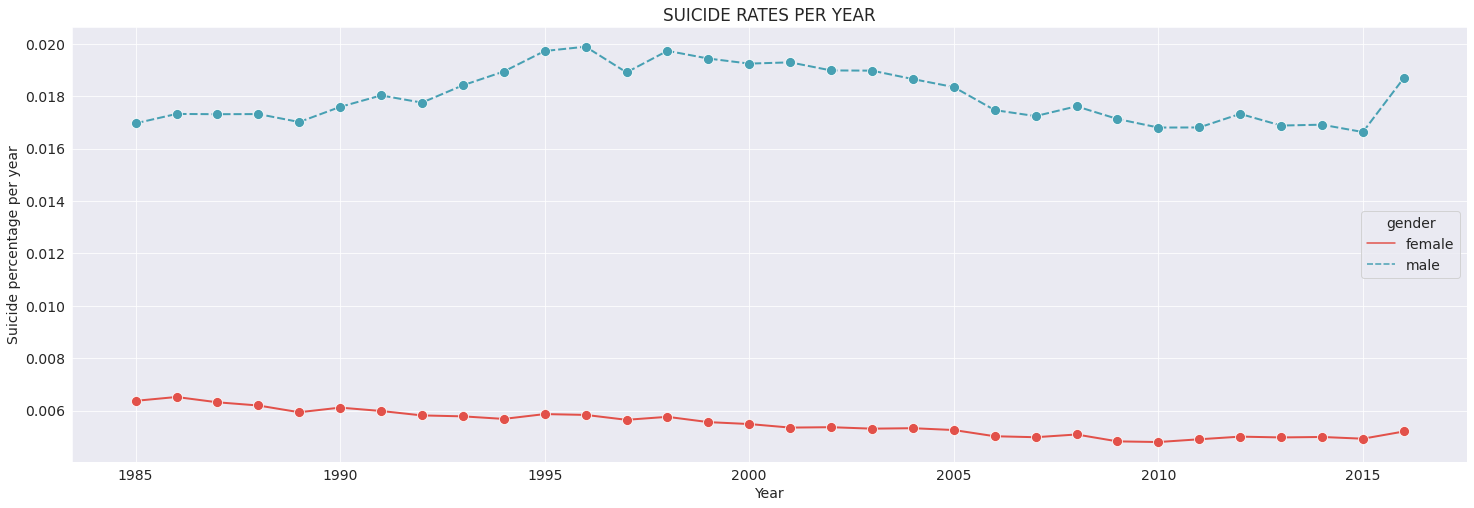

In [ ]:
plt.figure(figsize = (25,8))
plt.title('SUICIDE RATES PER YEAR')
sns.lineplot(data = pivot_df_suicide_percent , marker = 'o' ,linewidth = 2 , markersize = 10 , palette = color_5) 
plt.xlabel('Year')
plt.ylabel('Suicide percentage per year');
plt.legend(loc='center right' , title = 'gender');

From the chart above we can clearly say that the suicide percentage of men is too greater than the suicide percentage of women.


**NOW LETS ANALYZE THE SUICIDE PERCENTAGE DIFFERENCE BETWEEN MEN AND WOMEN**

In [ ]:
pivot_df_suicide_percent['diff'] = pivot_df_suicide_percent['male'] - pivot_df_suicide_percent['female']

In [ ]:
pivot_df_suicide_percent

sex,female,male,diff
year,,,
1985,0.006371,0.016964,0.010592
1986,0.006518,0.017322,0.010804
1987,0.006315,0.017312,0.010997
1988,0.006193,0.017317,0.011124
1989,0.005936,0.017014,0.011077
1990,0.006112,0.017591,0.011478
1991,0.005984,0.018028,0.012044
1992,0.005815,0.017754,0.011939
1993,0.005779,0.018415,0.012636


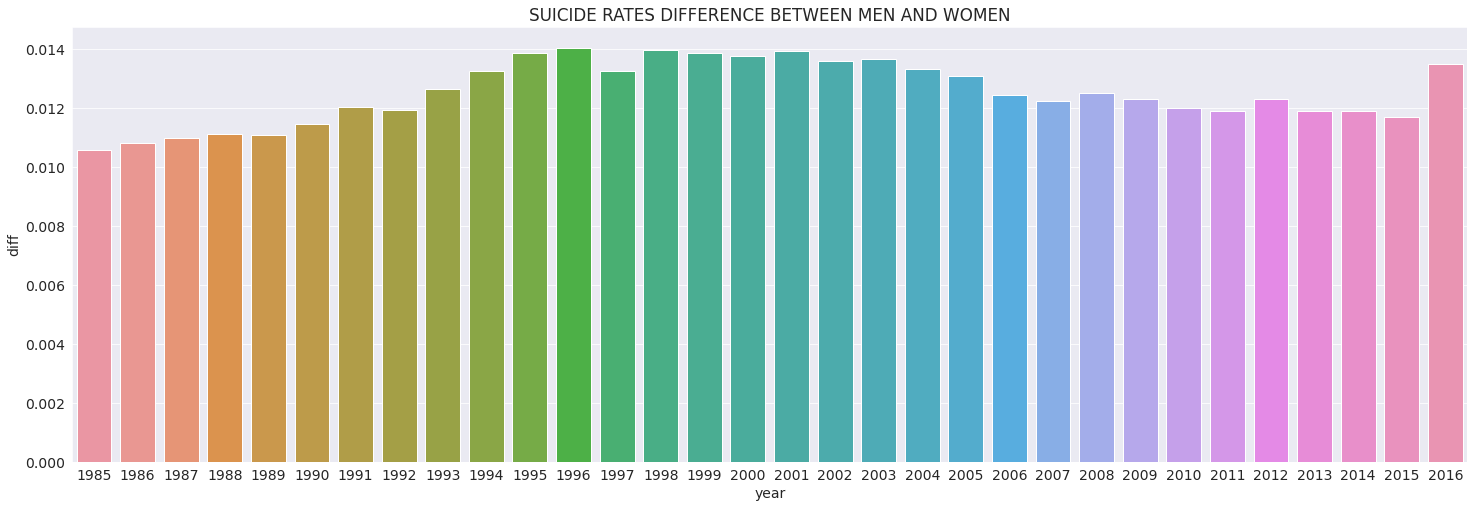

In [ ]:
plt.figure(figsize = (25,8))
plt.title("SUICIDE RATES DIFFERENCE BETWEEN MEN AND WOMEN")

sns.barplot(data = pivot_df_suicide_percent,
           x = pivot_df_suicide_percent.index , 
           y = 'diff');

From the bargraph above we can say that suicide percent difference was leaa during 1985-1990 then it started increasing. highest suicide rates difference was 1995-2003 then it started decreasing.

#### Q3: WHICH AGE GROUP POPULATION COMMITTED MOST SUICIDES AND WHEN ?

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


In [ ]:
col = ['year' , 'age_groups' , 'suicides_no']

In [ ]:
age_suicides_df = dataframe[col].copy()

In [ ]:
age_suicides_df

,year,age_groups,suicides_no
0,1985,75+ years,2
1,1985,25-34 years,19
2,1985,35-54 years,18
3,1985,55-74 years,9
4,1985,15-24 years,21
...,...,...,...
25739,2013,25-34 years,21
25740,2013,55-74 years,19
25741,2013,75+ years,5
25742,2013,5-14 years,2


In [ ]:
age_suicides_df = age_suicides_df.groupby(['year' , 'age_groups'])[['suicides_no']].sum()

In [ ]:
age_suicides_df

suicides_no
year age_groups              
1985 15-24 years        16889
     25-34 years        19878
     35-54 years        34572
     5-14 years           950
     55-74 years        28180
...                       ...
2016 15-24 years         1195
     25-34 years         2070
     35-54 years         5766
     55-74 years         4715
     75+ years           1857

[191 rows x 1 columns]

In [ ]:
age_suicides_df = age_suicides_df.reset_index(['year' , 'age_groups'])

In [ ]:
age_suicides_df

,year,age_groups,suicides_no
0,1985,15-24 years,16889
1,1985,25-34 years,19878
2,1985,35-54 years,34572
3,1985,5-14 years,950
4,1985,55-74 years,28180
...,...,...,...
186,2016,15-24 years,1195
187,2016,25-34 years,2070
188,2016,35-54 years,5766
189,2016,55-74 years,4715


In [ ]:
age_suicides_df.sort_values('suicides_no' , ascending = False)

,year,age_groups,suicides_no
110,2003,35-54 years,73073
104,2002,35-54 years,72222
92,2000,35-54 years,71157
146,2009,35-54 years,70720
98,2001,35-54 years,69991
...,...,...,...
3,1985,5-14 years,950
9,1986,5-14 years,917
15,1987,5-14 years,891
21,1988,5-14 years,807


Seems like people of age group 35-54 years committed maximum suicides in 2003.

Let's dig deep into this age group and check its variations over the years.

In [ ]:
age_suicides_df_1 = age_suicides_df[age_suicides_df.age_groups == '35-54 years']

In [ ]:
age_suicides_df_1.sample(5)

,year,age_groups,suicides_no
92,2000,35-54 years,71157
176,2014,35-54 years,63865
152,2010,35-54 years,69416
2,1985,35-54 years,34572
98,2001,35-54 years,69991


**PLOTTING CHART TO VISUALIZE THE TREND OF SUICIDES IN THIS AGE GROUP IN THE TIME PERIOD**

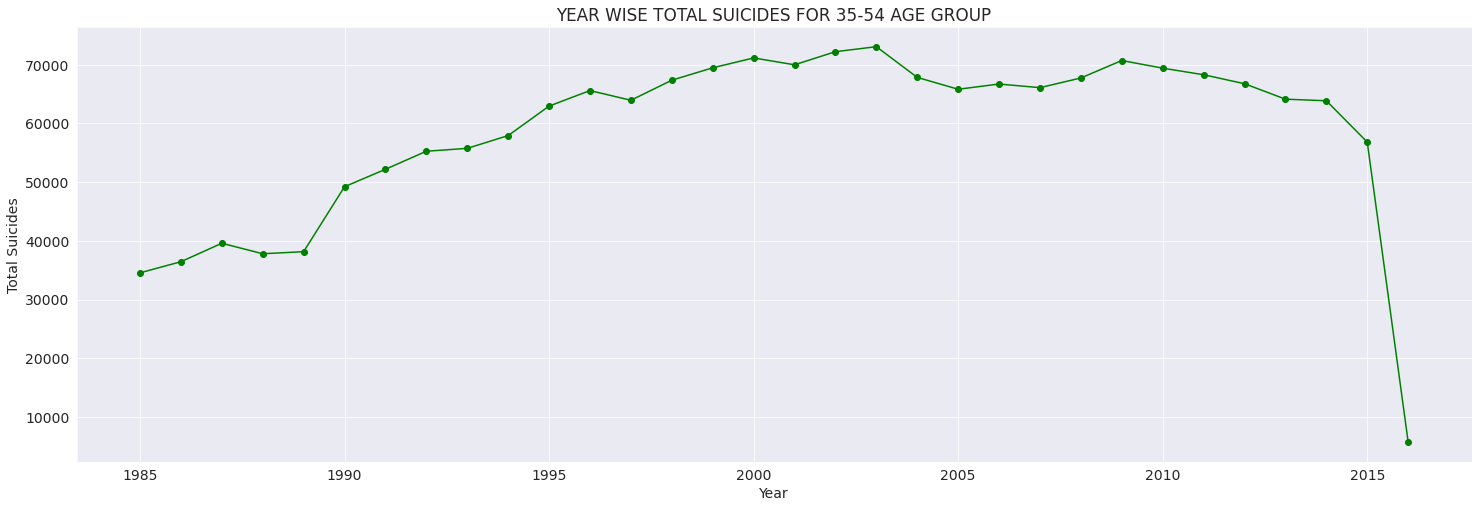

In [ ]:
plt.figure(figsize = (25,8))
plt.title("YEAR WISE TOTAL SUICIDES FOR 35-54 AGE GROUP")
plt.plot(age_suicides_df_1.year , age_suicides_df_1.suicides_no ,  'o-g')
plt.xlabel('Year')
plt.ylabel('Total Suicides');


From this visualization we can interpret that for this particular age group suicides were minimum in 1985 and after that is stared increasing and maximum suicides were in 2003 after then the number of suicides again started decreasing.

#### Q4: WHAT IS THE EFFECT OF HDI ON SUICIDES/10000K PEOPLE PER YEAR ?

In [ ]:
dataframe.sample(5)

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
14883,Slovenia,EUROPE,2000,female,75+ years,19,71649,0.824,20342201356,10783,G.I. Generation
2953,Turkmenistan,ASIA,2003,female,25-34 years,21,364978,NaN,5977560877,1431,Generation X
16641,Brazil,LATIN,1994,female,5-14 years,46,17753766,NaN,558111997497,3925,Millenials
12508,Bulgaria,EUROPE,1988,male,5-14 years,21,669200,NaN,22555941176,2688,Generation X
12534,Bulgaria,EUROPE,1991,male,75+ years,203,176700,NaN,10943548387,1298,G.I. Generation


In [ ]:
year_hdi = dataframe.groupby('year')[['HDI_for_year']].sum()

In [ ]:
year_hdi

,HDI_for_year
year,
1985,302.352
1986,0.000
1987,0.000
1988,0.000
1989,0.000
1990,421.404
1991,0.000
1992,0.000
1993,0.000


In [ ]:
rates_df = dataframe.groupby('year')[['suicides_no' , 'population' ]].sum()

In [ ]:
rates_df.head(5)

,suicides_no,population
year,,
1985,112343,970723012
1986,117108,991155543
1987,123422,1055684229
1988,117913,1014238760
1989,119127,1049769809


In [ ]:
rates_df['rates_10000k'] = rates_df['suicides_no'] * 10000000 / rates_df['population']

In [ ]:
rates_df.head(5)

,suicides_no,population,rates_10000k
year,,,
1985,112343,970723012,1157.312628
1986,117108,991155543,1181.529991
1987,123422,1055684229,1169.118536
1988,117913,1014238760,1162.576354
1989,119127,1049769809,1134.791637


In [ ]:
merge_hdi_rates = year_hdi.merge(rates_df , on = 'year')

In [ ]:
merge_hdi_rates = merge_hdi_rates[merge_hdi_rates.HDI_for_year > 0]

In [ ]:
merge_hdi_rates = merge_hdi_rates.reset_index('year')

In [ ]:
merge_hdi_rates

,year,HDI_for_year,suicides_no,population,rates_10000k
0,1985,302.352,112343,970723012,1157.312628
1,1990,421.404,150998,1289351325,1171.116026
2,1995,548.532,177964,1409083610,1262.976865
3,2000,662.424,192329,1574252598,1221.716262
4,2005,677.088,175842,1507060833,1166.787671
5,2010,774.708,189230,1767325475,1070.713927
6,2011,739.236,188991,1758548988,1074.698523
7,2012,727.176,185861,1682449455,1104.704807
8,2013,720.948,179496,1658816648,1082.072574
9,2014,692.844,181714,1676119619,1084.135034


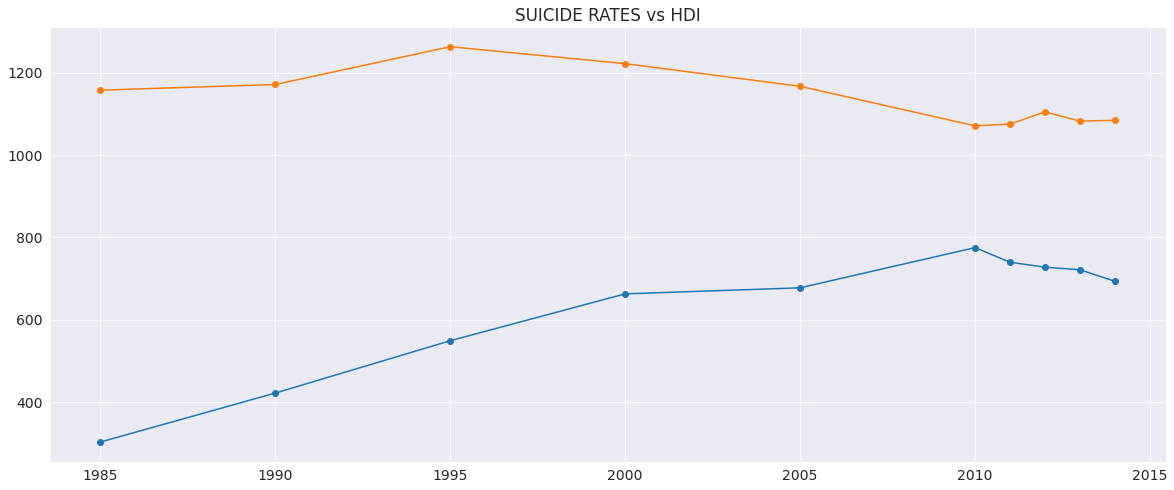

In [ ]:
plt.figure(figsize = (20,8))
plt.title("SUICIDE RATES vs HDI")

plt.plot(merge_hdi_rates.year , merge_hdi_rates.HDI_for_year , marker = 'o')
plt.plot(merge_hdi_rates.year , merge_hdi_rates.rates_10000k , marker = 'o');



Seems like HDI was increasing with the increment of suicide rates per 10000k population for 1985 to 1995 but then decrement of suicide rates increaased HDI for 1995 to 2010 and when after 2010 the HDI started decreasing the suicide rates started increasing.

#### Q5: WHICH GENERATION IN A REGION HAS OVERALL MAXIMUM SUICIDE RATES/1000K ?

In [ ]:
dataframe

,country,region,year,sex,age_groups,suicides_no,population,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Mauritius,AFRICA,1985,female,75+ years,2,8800,0.575,1080642033,1223,G.I. Generation
1,Mauritius,AFRICA,1985,male,25-34 years,19,88500,0.575,1080642033,1223,Boomers
2,Mauritius,AFRICA,1985,male,35-54 years,18,89500,0.575,1080642033,1223,Silent
3,Mauritius,AFRICA,1985,male,55-74 years,9,45300,0.575,1080642033,1223,G.I. Generation
4,Mauritius,AFRICA,1985,male,15-24 years,21,109400,0.575,1080642033,1223,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
25739,New Zealand,OCEANIA,2013,female,25-34 years,21,283720,0.911,190785204764,46198,Millenials
25740,New Zealand,OCEANIA,2013,female,55-74 years,19,447810,0.911,190785204764,46198,Boomers
25741,New Zealand,OCEANIA,2013,female,75+ years,5,152240,0.911,190785204764,46198,Silent
25742,New Zealand,OCEANIA,2013,female,5-14 years,2,291080,0.911,190785204764,46198,Generation Z


In [ ]:
use_copy = ['region' , 'suicides_no' , 'population' , 'generation' ]

In [ ]:
region_generation_df = dataframe[use_copy].copy()

In [ ]:
region_generation_df

,region,suicides_no,population,generation
0,AFRICA,2,8800,G.I. Generation
1,AFRICA,19,88500,Boomers
2,AFRICA,18,89500,Silent
3,AFRICA,9,45300,G.I. Generation
4,AFRICA,21,109400,Generation X
...,...,...,...,...
25739,OCEANIA,21,283720,Millenials
25740,OCEANIA,19,447810,Boomers
25741,OCEANIA,5,152240,Silent
25742,OCEANIA,2,291080,Generation Z


In [ ]:
region_generation_df = region_generation_df.groupby(['region' , 'generation'])[['suicides_no' , 'population']].sum()

In [ ]:
region_generation_df

suicides_no  population
region           generation                              
AFRICA           Boomers                 1377     9337540
                 G.I. Generation          104      897744
                 Generation X            1397    10564853
                 Generation Z              15     1776779
                 Millenials               544     7783451
                 Silent                   555     4444358
ASIA             Boomers               354640  1949775149
                 G.I. Generation        99840   292351257
                 Generation X          259197  2044337048
                 Generation Z            2503   360345630
                 Millenials             95898  1618250697
                 Silent                351060  1442703373
EUROPE           Boomers               761482  4284881202
                 G.I. Generation       220246   853396194
                 Generation X          415209  3722855604
                 Generation Z            2075   528666536
                 Millenials            127573  2567378665
                 Silent                678115  3471704192
LATIN            Boomers               175692  2635362160
                 G.I. Generation        27755   271264713
                 Generation X          193737  3588354651
                 Generation Z            5532   798984834
                 Millenials            127722  3149345805
                 Silent                111433  1396094620
NEAR_EAST        Boomers                 5658   140655770
                 G.I. Generation         1333     6891096
                 Generation X            7602   245396910
                 Generation Z             341   112529278
                 Millenials              5693   235682350
                 Silent                  3868    67388252
NORTHERN_AMERICA Boomers               396820  2506018826
                 G.I. Generation        96735   507415296
                 Generation X          279767  2145625803
                 Generation Z            2994   398450534
                 Millenials            112587  1618516374
                 Silent                252671  1704052551
OCEANIA          Boomers                27945   177883989
                 G.I. Generation         5593    34026393
                 Generation X           25634   167276017
                 Generation Z             170    30217424
                 Millenials              8882   119855137
                 Silent                 16627   125138253

In [ ]:
region_generation_df = region_generation_df.reset_index(['region' , 'generation'])

In [ ]:
region_generation_df.sample(5)

,region,generation,suicides_no,population
25,NEAR_EAST,G.I. Generation,1333,6891096
32,NORTHERN_AMERICA,Generation X,279767,2145625803
11,ASIA,Silent,351060,1442703373
17,EUROPE,Silent,678115,3471704192
2,AFRICA,Generation X,1397,10564853


In [ ]:
region_generation_df['rates'] = region_generation_df['suicides_no'] * 1000000 / region_generation_df['population'] 

In [ ]:
region_generation_df.sample(2)

,region,generation,suicides_no,population,rates
11,ASIA,Silent,351060,1442703373,243.334844
1,AFRICA,G.I. Generation,104,897744,115.845943


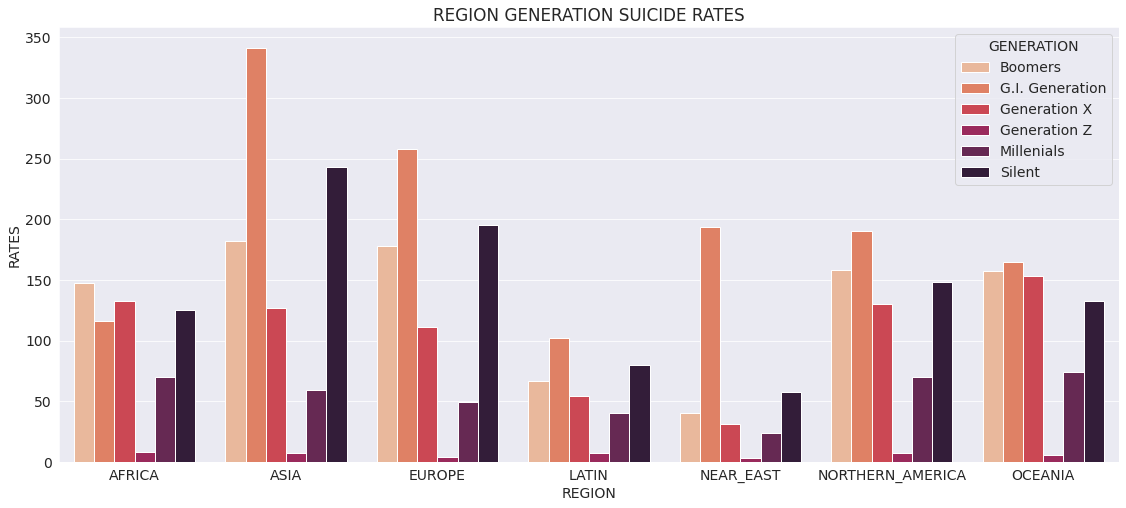

In [ ]:
plt.figure(figsize=(19,8))
plt.title("REGION GENERATION SUICIDE RATES")
sns.barplot(x='region', y='rates', hue='generation' , data=region_generation_df , palette=colors_1)
plt.legend(loc='upper right' , title = 'GENERATION');
plt.xlabel("REGION")
plt.ylabel("RATES");

From the barchart above we can clearly see that:

- AFRICA has maximum suicide rates of BOOMERS
- ASIA has maximum suicise rates of G.I. GENERATION
- EUROPE has maximum suicide rates of G.I. GENERATION
- LATIN REGION has maximum suicide rates of G.I. GENERATION
- NEAR EAST has maximum suicide rates of G.I. GENERATION
- NORTHERN AMERICA has maximum suicide rates of G.I. GENERATION
- OCEANA has maximum suicide rates of G.I. GENERATION

And as for minimum suicide rates in all the regions it is GENERATION Z

## Inferences and Conclusion

In conclusion, this notebook is provided an overview of the exploratory data analysis of word suicide overview from the year 1985 to 2015. We explored different subtopics to provide a complete picture of the data, including trends, geographical analysis, and social and economic factors. By understanding these trends, we can help to identify the causes of suicide and develop preventive measures.

## References and Future Work

**References :**

- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://seaborn.pydata.org/
- https://pandas.pydata.org/
- https://matplotlib.org/

**Future work:**

In terms of future work, there is still much to be done in this area of research. Here are some potential areas for further exploration:

- Time-series analysis: By performing time-series analysis, we can identify short-term and long-term trends and predict future suicide rates.

- Machine learning models: Machine learning algorithms can be used to identify the most significant factors contributing to suicide rates and to develop predictive models.

- Cross-country analysis: By comparing suicide rates and factors across different countries, we can better understand the cultural and social factors that contribute to suicide.

- Text analysis: Using natural language processing, we can analyze text data related to suicide, such as social media posts or suicide notes, to identify patterns and insights.

By continuing to explore these and other areas of research, we can gain a deeper understanding of the causes of suicide and develop more effective preventive measures.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nsnidhisingh1221/suicide-analysis-eda-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/nsnidhisingh1221/suicide-analysis-eda-project


'https://jovian.com/nsnidhisingh1221/suicide-analysis-eda-project'